# Crypto Momemtum Prediction Model
### Goal: Get dataset of historical crypto asset data along with as many other assets with strong correlation in price movement to bitcoin and train a model on it. The model should be useful in predicting whether bitcoin's price will rise more than 10% over the following 2 days

In [1]:
# Get list of as many crypto projects as possible and try to group them in one of the 4 waves:
import os
from dotenv import load_dotenv
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import time
import yfinance as yf
import pandas as pd
from finta import TA

load_dotenv()
cmc_api_key = os.environ.get('coinmarketcap_api')

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' #prod api
# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' #sandbox api
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': cmc_api_key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = response.json()

  desired_cols = ['id', 'name', 'symbol', 'slug', 'cmc_rank', 'num_market_pairs', 'circulating_supply', 'total_supply', 'max_supply', 'infinite_supply', 'last_updated', 'date_added', 'tags', 'platform', 'self_reported_circulating_supply', 'self_reported_market_cap', 'price', 'volume_24h', 'volume_change_24h', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d', 'market_cap', 'market_cap_dominance', 'fully_diluted_market_cap']
  cleaned_cryptos = []

  # Check if the request was successful
  if data['status']['error_code'] == 0:
      cryptos = data['data']
      for crypto in cryptos:
        temp_dict = crypto.copy()
        temp_dict.pop('quote', None)
        dct = {**temp_dict, **crypto['quote']['USD']}
        cleaned_dict = {col: dct[col] for col in desired_cols if col in dct}
        cleaned_cryptos.append(cleaned_dict)


except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df = pd.DataFrame(cleaned_cryptos)

In [2]:
_100 = df.loc[df['cmc_rank'] <= 1000]

In [4]:
#Pull historical data for list of cryptos

desired_cols2 = ['date','open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'return','id','symbol']
main_df = pd.DataFrame(columns=desired_cols2)

no_historicals = []

for index, row in _100.iterrows():
    try:
        tickerSymbol = row['symbol'].upper() + '-' + 'USD'

        # Get data from Yahoo Finance API
        tickerData = yf.Ticker(tickerSymbol)


        # Get the historical prices for this ticker
        hist_price = tickerData.history(period='max', interval='1d') 
        hist_price.reset_index(inplace=True)
        hist_price.rename({'Date':'date'}, axis=1, inplace=True)
        hist_price.columns = hist_price.columns.str.lower()
        hist_price['date'] = pd.to_datetime(hist_price['date']).dt.strftime('%Y-%m-%d')
        
        # Append the id to the hist_price DataFrame
        hist_price['id'] = row['id']
        hist_price['symbol'] = row['symbol']
        for col in desired_cols2:
            if col not in hist_price.columns:
                hist_price[col] = pd.NA

        cols_to_select = [col for col in desired_cols2 if col in hist_price.columns]
        hist_price = hist_price[cols_to_select]
        main_df = pd.concat([main_df, hist_price], ignore_index=True)

    except Exception as e:
        no_historicals.append(row)

no_historicals_df = pd.DataFrame(data = no_historicals, columns=desired_cols2)

# display(no_historicals_df)
# main_df

if not no_historicals_df.empty:
    main_df = pd.concat([main_df, no_historicals_df], ignore_index=True)
main_df    

T-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
WAXP-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
ONT-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
POLYX-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
XYM-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
PYUSD-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
VVS-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
RBTC-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
RMRK-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
CLV-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
AKRO-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-27)
EPIK-USD: No price data found, symbol may be delisted (1d 1924-12-21 -> 2023-11-2

,date,open,high,low,close,volume,dividends,stock splits,return,id,symbol
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,NaN,1,BTC
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,NaN,1,BTC
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,NaN,1,BTC
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,NaN,1,BTC
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,NaN,1,BTC
...,...,...,...,...,...,...,...,...,...,...,...
1169585,2023-11-23,0.001162,0.001201,0.001104,0.001119,32563,0.0,0.0,NaN,11560,DHB
1169586,2023-11-24,0.001119,0.001318,0.001118,0.001170,26648,0.0,0.0,NaN,11560,DHB
1169587,2023-11-25,0.001170,0.001275,0.001104,0.001224,32833,0.0,0.0,NaN,11560,DHB
1169588,2023-11-26,0.001224,0.001375,0.001165,0.001369,48095,0.0,0.0,NaN,11560,DHB


In [5]:
#Find related assets with longer histories and get their historical data
assets = [
    "GC=F","EURUSD=X", "JPY=X", "GBPUSD=X", "AUDUSD=X", "NZDUSD=X",  # Currencies
    "AAPL", "MSFT", "TSLA", "GOOGL", "AMZN",                 # Stocks
    "^GSPC", "^DJI", "^IXIC", "^FTSE", "^N225",              # Indices
    "GC=F", "SI=F", "CL=F", "NG=F", "C=F",                   # Commodities
    "SPY", "IVV", "VTI", "QQQ", "GLD"                        # ETFs
]

desired_cols3 = ['date','open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'return','id','symbol']
main_df_2 = pd.DataFrame(columns=desired_cols3)

no_historicals_2 = []

for asset in assets:
    try:
        tickerSymbol = asset

        # Get data from Yahoo Finance API
        tickerData = yf.Ticker(tickerSymbol)


        # Get the historical prices for this ticker
        hist_price_2 = tickerData.history(period='max', interval='1d') 
        hist_price_2.reset_index(inplace=True)
        hist_price_2.rename({'Date':'date'}, axis=1, inplace=True)
        hist_price_2.columns = hist_price_2.columns.str.lower()
        hist_price_2['date'] = pd.to_datetime(hist_price_2['date']).dt.strftime('%Y-%m-%d')
        
        
        # Append the id to the hist_price_2 DataFrame
        # hist_price_2['id'] = row['id']
        hist_price_2['symbol'] = asset
        for col in desired_cols3:
            if col not in hist_price_2.columns:
                hist_price_2[col] = pd.NA

        cols_to_select = [col for col in desired_cols3 if col in hist_price_2.columns]
        hist_price_2 = hist_price_2[cols_to_select]
        main_df_2 = pd.concat([main_df_2, hist_price_2], ignore_index=True)

    except Exception as e:
        no_historicals_2.append(asset)

no_historicals_df_2 = pd.DataFrame(data = no_historicals_2, columns=desired_cols3)

# display(no_historicals_df_2)
# main_df_2

if not no_historicals_df_2.empty:
    main_df_2 = pd.concat([main_df_2, no_historicals_df_2], ignore_index=True)
main_df_2    

,date,open,high,low,close,volume,dividends,stock splits,return,id,symbol
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0,0.0,0.0,<NA>,<NA>,GC=F
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0,0.0,0.0,<NA>,<NA>,GC=F
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,0,0.0,0.0,<NA>,<NA>,GC=F
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,2,0.0,0.0,<NA>,<NA>,GC=F
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,0,0.0,0.0,<NA>,<NA>,GC=F
...,...,...,...,...,...,...,...,...,...,...,...
191900,2023-11-17,183.960007,184.130005,183.449997,183.669998,4871100,0.0,0.0,<NA>,<NA>,GLD
191901,2023-11-20,182.320007,183.479996,182.229996,183.369995,5389300,0.0,0.0,<NA>,<NA>,GLD
191902,2023-11-21,185.570007,186.119995,185.070007,185.350006,7322400,0.0,0.0,<NA>,<NA>,GLD
191903,2023-11-22,185.470001,185.720001,184.270004,184.559998,4337700,0.0,0.0,<NA>,<NA>,GLD


In [262]:
#Join and stack them making sure to handle transitions to new assets when calculating return column
main_df_concat = pd.concat([main_df, main_df_2], ignore_index=True)

#Handling making sure not to keep data where return is calculated from one asset to the next
main_df_concat['return'] = main_df_concat.groupby('symbol')['close'].pct_change().shift(-1)
main_df_concat['symbol_shifted'] = main_df_concat['symbol'].shift(-1)
main_df_concat = main_df_concat[main_df_concat['symbol'] == main_df_concat['symbol_shifted']]

<AxesSubplot:xlabel='date'>

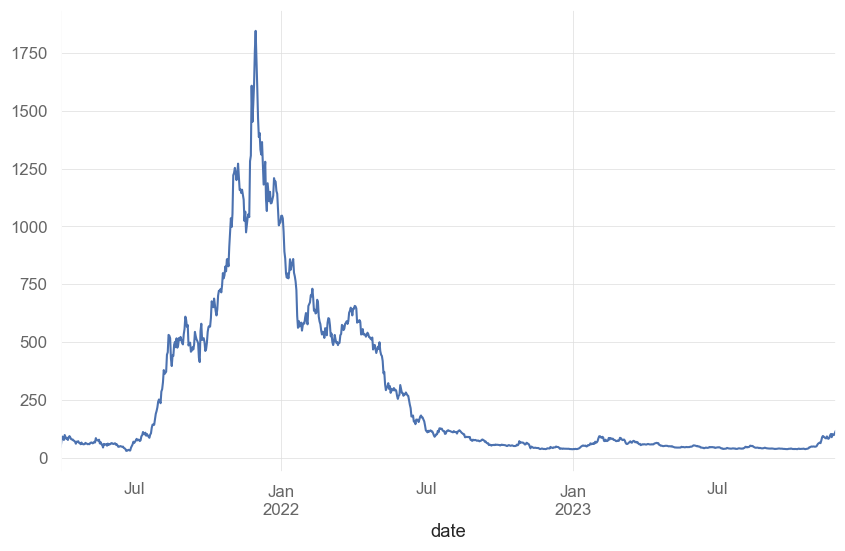

In [281]:
#Look at example to make sure matches reputable online data
main_df_concat['date'] = pd.to_datetime(main_df_concat['date'])
main_df_concat.index = main_df_concat['date']
main_df_concat.loc[main_df_concat['symbol'] == 'ILV','close'].plot()

In [8]:
#Feature engineering round 1
# Moving Averages
main_df_concat['SMA'] = TA.SMA(main_df_concat, 12)
main_df_concat['SMM'] = TA.SMM(main_df_concat)
main_df_concat['SSMA'] = TA.SSMA(main_df_concat)
main_df_concat['EMA'] = TA.EMA(main_df_concat)
main_df_concat['DEMA'] = TA.DEMA(main_df_concat)
main_df_concat['TEMA'] = TA.TEMA(main_df_concat)
main_df_concat['TRIMA'] = TA.TRIMA(main_df_concat)
main_df_concat['TRIX'] = TA.TRIX(main_df_concat)
# main_df_concat['VAMA'] = TA.VAMA(main_df_concat)
main_df_concat['ER'] = TA.ER(main_df_concat)
main_df_concat['KAMA'] = TA.KAMA(main_df_concat)
main_df_concat['ZLEMA'] = TA.ZLEMA(main_df_concat)
main_df_concat['WMA'] = TA.WMA(main_df_concat)
main_df_concat['HMA'] = TA.HMA(main_df_concat)
# main_df_concat['EVWMA'] = TA.EVWMA(main_df_concat)
main_df_concat['VWAP'] = TA.VWAP(main_df_concat)
main_df_concat['SMMA'] = TA.SMMA(main_df_concat)
main_df_concat['FRAMA'] = TA.FRAMA(main_df_concat)


# Momentum Indicators
main_df_concat['MACD'] = TA.MACD(main_df_concat)['MACD']  # MACD returns a DataFrame with multiple columns
main_df_concat['MOM'] = TA.MOM(main_df_concat)
main_df_concat['ROC'] = TA.ROC(main_df_concat)
main_df_concat['RSI'] = TA.RSI(main_df_concat)
main_df_concat['IFT_RSI'] = TA.IFT_RSI(main_df_concat)


# Volatility Indicators
main_df_concat['TR'] = TA.TR(main_df_concat)
main_df_concat['ATR'] = TA.ATR(main_df_concat)
# main_df_concat['SAR'] = TA.SAR(main_df_concat)
main_df_concat['BBANDS'] = TA.BBANDS(main_df_concat)['BB_UPPER']  # BBANDS returns a DataFrame with multiple columns
main_df_concat['BBANDS'] = TA.BBANDS(main_df_concat)['BB_LOWER']  # BBANDS returns a DataFrame with multiple columns
main_df_concat['BBWIDTH'] = TA.BBWIDTH(main_df_concat)
main_df_concat['PERCENT_B'] = TA.PERCENT_B(main_df_concat)
main_df_concat['KC'] = TA.KC(main_df_concat)['KC_UPPER']  # KC returns a DataFrame with multiple columns

# Trend Indicators
main_df_concat['ADX'] = TA.ADX(main_df_concat)


# Oscillators
main_df_concat['STOCHD'] = TA.STOCHD(main_df_concat)
main_df_concat['STOCHRSI'] = TA.STOCHRSI(main_df_concat)
main_df_concat['WILLIAMS'] = TA.WILLIAMS(main_df_concat)
main_df_concat['UO'] = TA.UO(main_df_concat)
main_df_concat['AO'] = TA.AO(main_df_concat)
main_df_concat['MI'] = TA.MI(main_df_concat)

# Volume Indicators
main_df_concat['ADL'] = TA.ADL(main_df_concat)
main_df_concat['CHAIKIN'] = TA.CHAIKIN(main_df_concat)
main_df_concat['MFI'] = TA.MFI(main_df_concat)
main_df_concat['OBV'] = TA.OBV(main_df_concat)
main_df_concat['WOBV'] = TA.WOBV(main_df_concat)
main_df_concat['VZO'] = TA.VZO(main_df_concat)
main_df_concat['PZO'] = TA.PZO(main_df_concat)
main_df_concat['EFI'] = TA.EFI(main_df_concat)
main_df_concat['CFI'] = TA.CFI(main_df_concat)
# main_df_concat['EMV'] = TA.EMV(main_df_concat)
main_df_concat['CCI'] = TA.CCI(main_df_concat)
main_df_concat['COPP'] = TA.COPP(main_df_concat)
main_df_concat['CMO'] = TA.CMO(main_df_concat)
main_df_concat['QSTICK'] = TA.QSTICK(main_df_concat)
main_df_concat['WTO'] = TA.WTO(main_df_concat)['WT1.']  # WTO returns a DataFrame with multiple columns
main_df_concat['FISH'] = TA.FISH(main_df_concat)
main_df_concat['SQZMI'] = TA.SQZMI(main_df_concat)
# main_df_concat['VPT'] = TA.VPT(main_df_concat)
main_df_concat['FVE'] = TA.FVE(main_df_concat)
main_df_concat['VFI'] = TA.VFI(main_df_concat)
main_df_concat['MSD'] = TA.MSD(main_df_concat)
main_df_concat['STC'] = TA.STC(main_df_concat)

# main_df_sm = main_df[]
main_df_concat.fillna(0, inplace=True)


/Users/Justin/Downloads/code/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
#Feature engineering round 2
main_df_sm = main_df_concat.copy()
# Define the rolling window (e.g., 30 days)
rolling_window = 30

main_df_sm['rolling_return'] = main_df_sm['return'].shift(1).rolling(window=rolling_window).mean()

# Calculate rolling standard deviation (for Sharpe Ratio)
main_df_sm['rolling_std_dev'] = main_df_sm['return'].shift(1).rolling(window=rolling_window).std()

# Calculate downside deviation (for Sortino Ratio)
def downside_deviation(series):
    return series[series < 0].std()

main_df_sm['downside_deviation'] = main_df_sm['return'].shift(1).rolling(window=rolling_window).apply(downside_deviation)

# Define the risk-free rate
risk_free_rate = 0 #/ 252  # Annualized risk-free rate divided by the number of trading days

# Calculate Sharpe Ratio (assume 252 trading days for annualization)
#I'M shifting these back a day so that they become sharpe and sortino ratios that in practice I would have today based on data up until close yesterday and therefore I can use them as features for prediction. 
main_df_sm['sharpe_ratio'] = (main_df_sm['rolling_return'].shift(1) - risk_free_rate) / main_df_sm['rolling_std_dev'] * (252 ** 0.5)

# Calculate Sortino Ratio
main_df_sm['sortino_ratio'] = (main_df_sm['rolling_return'].shift(1) - risk_free_rate) / main_df_sm['downside_deviation'] * (252 ** 0.5)

# Drop NaN values created by rolling calculations
main_df_sm.dropna(inplace=True)
main_df_sm[['return','rolling_return','rolling_std_dev','downside_deviation','sharpe_ratio','sortino_ratio']]

,return,rolling_return,rolling_std_dev,downside_deviation,sharpe_ratio,sortino_ratio
31,-0.004844,-0.002019,0.037290,0.022781,-2.164124,-3.542379
32,-0.017202,0.000148,0.035033,0.020915,-0.914706,-1.532120
33,0.009482,-0.001617,0.034508,0.020361,0.068078,0.115379
34,-0.008583,-0.000479,0.034284,0.021028,-0.748518,-1.220398
35,-0.064571,-0.001043,0.034273,0.020767,-0.221662,-0.365832
...,...,...,...,...,...,...
1361489,-0.000109,0.002856,0.007154,0.003146,5.367354,12.203664
1361490,-0.001633,0.002681,0.007160,0.003276,6.332213,13.841473
1361491,0.010798,0.002013,0.006553,0.003242,6.493862,13.127717
1361492,-0.004262,0.002429,0.006705,0.003279,4.766934,9.748605


In [10]:
#Checkpoint
# df_merged = pd.merge(_100, main_df_sm, on = 'id')
df_merged = main_df_sm.copy()
df_merged.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'return', 'id', 'symbol', 'symbol_shifted', 'SMA',
       'SMM', 'SSMA', 'EMA', 'DEMA', 'TEMA', 'TRIMA', 'TRIX', 'ER', 'KAMA',
       'ZLEMA', 'WMA', 'HMA', 'VWAP', 'SMMA', 'FRAMA', 'MACD', 'MOM', 'ROC',
       'RSI', 'IFT_RSI', 'TR', 'ATR', 'BBANDS', 'BBWIDTH', 'PERCENT_B', 'KC',
       'ADX', 'STOCHD', 'STOCHRSI', 'WILLIAMS', 'UO', 'AO', 'MI', 'ADL',
       'CHAIKIN', 'MFI', 'OBV', 'WOBV', 'VZO', 'PZO', 'EFI', 'CFI', 'CCI',
       'COPP', 'CMO', 'QSTICK', 'WTO', 'FISH', 'SQZMI', 'FVE', 'VFI', 'MSD',
       'STC', 'rolling_return', 'rolling_std_dev', 'downside_deviation',
       'sharpe_ratio', 'sortino_ratio'],
      dtype='object')

In [11]:
#Create lagging features to help model follow trends
def create_lag_features(df, lags):
    df = df.copy()
    for lag in lags:
        df[f'lag_{lag}'] = df['rolling_return'].shift(lag)  # Assuming 'close' is the column you want to predict
    return df

lags = [2, 3, 7, 14]  # For example, create lags for 2, 3, 7, and 14 days.starting with 2 day lag so it's yesterday's lag which I would have access to today
df_merged_lag = create_lag_features(df_merged, lags)

df_merged_lag['target'] = (df_merged_lag['rolling_return'] > 0).astype(int)
df_merged_lag['target'].sum()/len(df_merged_lag)
df_merged_lag

,date,open,high,low,close,volume,dividends,stock splits,return,id,...,rolling_return,rolling_std_dev,downside_deviation,sharpe_ratio,sortino_ratio,lag_2,lag_3,lag_7,lag_14,target
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,11416800,0.0,0.0,-0.004844,1,...,-0.002019,0.037290,0.022781,-2.164124,-3.542379,NaN,NaN,NaN,NaN,0
32,2014-10-19,391.253998,393.938995,386.457001,389.545990,5914570,0.0,0.0,-0.017202,1,...,0.000148,0.035033,0.020915,-0.914706,-1.532120,NaN,NaN,NaN,NaN,1
33,2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,0.0,0.0,0.009482,1,...,-0.001617,0.034508,0.020361,0.068078,0.115379,-0.002019,NaN,NaN,NaN,0
34,2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,0.0,0.0,-0.008583,1,...,-0.000479,0.034284,0.021028,-0.748518,-1.220398,0.000148,-0.002019,NaN,NaN,0
35,2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300,0.0,0.0,-0.064571,1,...,-0.001043,0.034273,0.020767,-0.221662,-0.365832,-0.001617,0.000148,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361489,2023-11-16,182.850006,184.320007,182.800003,183.690002,8253300,0.0,0.0,-0.000109,0,...,0.002856,0.007154,0.003146,5.367354,12.203664,0.002503,0.002109,0.001215,0.001472,1
1361490,2023-11-17,183.960007,184.130005,183.449997,183.669998,4871100,0.0,0.0,-0.001633,0,...,0.002681,0.007160,0.003276,6.332213,13.841473,0.002419,0.002503,0.001295,0.001088,1
1361491,2023-11-20,182.320007,183.479996,182.229996,183.369995,5389300,0.0,0.0,0.010798,0,...,0.002013,0.006553,0.003242,6.493862,13.127717,0.002856,0.002419,0.001595,0.000937,1
1361492,2023-11-21,185.570007,186.119995,185.070007,185.350006,7322400,0.0,0.0,-0.004262,0,...,0.002429,0.006705,0.003279,4.766934,9.748605,0.002681,0.002856,0.001573,0.000808,1


In [13]:
import numpy as np
# Find the index of the maximum return value
max_return_idx = df_merged_lag['return'].idxmax()

# Display the row for the maximum return
# print(df_merged_lag.loc[max_return_idx])

# Display rows around the maximum return for context
df_merged_lag.loc[max_return_idx - 1:max_return_idx + 5,['date','open','close','return','symbol']]

# remove outliers
df_merged_lag.loc[max_return_idx - 1:max_return_idx +1,['date','open','close','return','symbol']]

# Define a threshold for capping the returns
return_threshold = 1  # 100%

# Identify the outliers: returns that are greater than the threshold or less than the negative threshold
outliers = (df_merged_lag['return'] > return_threshold) | (df_merged_lag['return'] < -return_threshold)

# Replace the outliers with NaN
df_merged_lag.loc[outliers, 'return'] = np.nan

# Forward fill the NaN values with the last valid observation
df_merged_lag['return'].ffill(inplace=True)


### Get this cell below fixed. Group clusters then retrain each separately and averaging their predictions to see if can get similar. I would prefer this because it's reducing noise
### After that decide which model to trade on alpaca with paper profits
### Need to retrain model for bovada and/or get it avg odds up

In [ ]:
#Print Correlation Matrix to determine groupings in case decide to train separate highly correlated models

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import seaborn as sns
import matplotlib.pyplot as plt


# df_merged_lag.drop(['tags','platform'], axis = 1, inplace=True)
# df_pivot = df_merged_lag[~df_merged_lag[['date','name']].index.duplicated(keep='first')]
df_merged_lag.drop_duplicates(subset=['date','name'], inplace=True)
# Pivot the DataFrame to have cryptos as columns
df_pivot = df_merged_lag.pivot(index='date', columns='name', values='close')

# Fill missing values
df_pivot = df_pivot.fillna(method='ffill').fillna(method='bfill')

# Drop columns (cryptocurrencies) with constant close values
df_pivot = df_pivot.loc[:, df_pivot.std() > 0]

# Compute the correlation matrix
corr_matrix = df_pivot.corr()

# Perform hierarchical clustering
linked = linkage(corr_matrix, 'complete')  # also single or ward
sns.clustermap(corr_matrix, row_linkage=linked, col_linkage=linked)
plt.show()

# thresholds = [6, 5, 4, 3, 2, 1]  # Example threshold values, adjust as needed
# for t in thresholds:
#     labels = fcluster(linked, t=t, criterion='distance')
#     num_clusters = len(set(labels))
#     print(f"Threshold: {t}, Number of Clusters: {num_clusters}")

# Set a distance threshold to determine clusters; you might have to adjust this
labels = fcluster(linked, t=20, criterion='distance')
clusters = {i: [] for i in set(labels)}
for crypto, cluster_id in zip(corr_matrix.columns, labels):
    clusters[cluster_id].append(crypto)

print(clusters)

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=corr_matrix.columns, orientation='top')
plt.show()

In [ ]:
#EDA
# Support and Resistance - It's a zone. Tends to be along even numbers
# Market Memory previous tops become bottoms because shorters look to get out or FOMO
# Daily or more for support or res levels then trade at smaller time frames if desire (weekly or monthly patterns then trade daily)
# Fibbonacci is commonly used so it's important. Ripples or waves down or up you'll see specific levels. 50% will likely be a resistance on a rally after a swing low
# EMAs will crush you in a flat market. important to only use when there is volatility pair with something else
#Death crosses and golden crosses into these
#MACD shows losing or gaining momentum
#Stochastic oscillator for choppy markets where no trends for when there is indecision (this is rangebound) in the market is overbought or oversold Look at when the 50 ema is flatter to identify a range. 20 and 80
#buy at bollinger bound and sell at the mean. Use with support and resistance
#Volume needs to be used here to determine if it's worth trading
#Double tops and Double Bottoms to spot trend reversals Always look for a double top after an extended run higher and double bottom at extended run lower
#Used Rectangles, Heads and Shoulders, Wedges, Flags etc
#Stoch with rectangles. Wait for them to break then follow
#head and shoulders indicate a failed trend/losing momentum
#head and shoulders neckline can be resistance and the amount from top of the head to neckline often the upcoming downward move. Widely used reversal pattern. Wait until it passes the neckline in the reverse.
#Put stop losses lower or higher than price targets due to slippage or inertia stopping
#cup and handle is good trend reversal
#Bull and bear flags  indicate trend reversal or continutions and can used pole as trend
#Need to first look at large scale indicators then if they check out drill down to smaller scale indicators (general fear is high a bull flag on daily or even weekly might not mean anything)
#triangles are wedges that have built in measuring stick
#Volume is a good prereq large scale indicator that you would want to check off before considering others in a rule-based system

In [15]:
#Checkpoint 2 for time saving
import numpy as np

df_merged_lag.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged_lag['return'].max()
#Modifying to see if next day target changed the accuracy at all.
df_merged_lag_copy = df_merged_lag.copy()

# df_merged_lag_copy = df_merged_lag_copy[df_merged_lag_copy['name'] == 'Bitcoin']
df_merged_lag_copy['target'] = (df_merged_lag_copy['return'] > 0).astype(int)

In [16]:
#Create synthetic date range to simulate all assets as if they were one continuous asset so as to enlarge dataset. Theoretically possible because they share strong correlations with each other. The hope is that this approach allows for the model to be exposed to more nuance as well as acting as an oversampling to help it train on common patterns


# !pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
# Assuming you have a DataFrame named 'df_merged_lag_copy_sm' containing tweet df_merged_lag_copy_sm with columns: tweet_sentiment and target
# Reshape the input feature to have a two-dimensional shape

# df_merged_lag_copy_sm.dropna(inplace=True)
df_merged_lag_copy_sm = df_merged_lag_copy.copy()
df_merged_lag_copy_sm['date'] = pd.to_datetime(df_merged_lag_copy_sm['date'])


print(df_merged_lag_copy_sm.shape)
# Choose columns you want to normalize
df_merged_lag_copy_sm.replace([np.inf, -np.inf], np.nan, inplace=True)

print(df_merged_lag_copy_sm.shape)
#temp mods
# cols_refined = ['date','volume','percent_change_7d','market_cap_dominance','SMA','RSI','target'] .5
# cols_refined = ['date','rolling_std_dev','downside_deviation', 'sharpe_ratio', 'sortino_ratio', 'lag_2', 'lag_3','lag_7', 'lag_14', 'target'] .48
# Calculate the percentage of null values for each column
null_percentage = df_merged_lag_copy_sm.isnull().mean() * 100


from datetime import datetime, timedelta

def add_days_to_date(date_str, days):
    """Add a specified number of days to a date string."""
    date_format = "%Y-%m-%d"
    date_obj = datetime.strptime(date_str, date_format)
    new_date_obj = date_obj + timedelta(days=days)
    return new_date_obj.strftime(date_format)

# Convert 'date' to string format and sort
df_merged_lag_copy_sm['date_str'] = df_merged_lag_copy_sm['date'].dt.strftime('%Y-%m-%d')
df_merged_lag_copy_sm.sort_values(by=['symbol', 'date_str'], inplace=True)

# Get the date range for each crypto
crypto_date_ranges = df_merged_lag_copy_sm.groupby('symbol')['date_str'].agg(['min', 'max'])

# Set an early start date as a string
start_date_str = '1677-01-01'

# Dictionary for start dates of each crypto
crypto_start_dates = {}

# Initialize the next start date
next_start_date_str = start_date_str

# Assign start dates for each cryptocurrency
for crypto in df_merged_lag_copy_sm['symbol'].unique():
    crypto_start_dates[crypto] = next_start_date_str
    num_days = (datetime.strptime(crypto_date_ranges.loc[crypto, 'max'], '%Y-%m-%d') - 
                datetime.strptime(crypto_date_ranges.loc[crypto, 'min'], '%Y-%m-%d')).days
    next_start_date_str = add_days_to_date(next_start_date_str, num_days + 1)

# Apply the synthetic dates
synthetic_dates = []

for index, row in df_merged_lag_copy_sm.iterrows():
    crypto = row['symbol']
    date_offset = (datetime.strptime(row['date_str'], '%Y-%m-%d') - 
                   datetime.strptime(crypto_date_ranges.loc[crypto, 'min'], '%Y-%m-%d')).days
    synthetic_date_str = add_days_to_date(crypto_start_dates[crypto], date_offset)
    synthetic_dates.append(synthetic_date_str)

# Add the synthetic dates to the DataFrame
df_merged_lag_copy_sm['synthetic_date_str'] = synthetic_dates

# Now you can sort and use 'synthetic_date_str' for plotting or analysis
df_merged_lag_copy_sm.sort_values(by='synthetic_date_str', inplace=True)

(1341383, 76)
(1341383, 76)


In [17]:
df_merged_lag_copy_sm.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'return', 'id', 'symbol', 'symbol_shifted', 'SMA',
       'SMM', 'SSMA', 'EMA', 'DEMA', 'TEMA', 'TRIMA', 'TRIX', 'ER', 'KAMA',
       'ZLEMA', 'WMA', 'HMA', 'VWAP', 'SMMA', 'FRAMA', 'MACD', 'MOM', 'ROC',
       'RSI', 'IFT_RSI', 'TR', 'ATR', 'BBANDS', 'BBWIDTH', 'PERCENT_B', 'KC',
       'ADX', 'STOCHD', 'STOCHRSI', 'WILLIAMS', 'UO', 'AO', 'MI', 'ADL',
       'CHAIKIN', 'MFI', 'OBV', 'WOBV', 'VZO', 'PZO', 'EFI', 'CFI', 'CCI',
       'COPP', 'CMO', 'QSTICK', 'WTO', 'FISH', 'SQZMI', 'FVE', 'VFI', 'MSD',
       'STC', 'rolling_return', 'rolling_std_dev', 'downside_deviation',
       'sharpe_ratio', 'sortino_ratio', 'lag_2', 'lag_3', 'lag_7', 'lag_14',
       'target', 'date_str', 'synthetic_date_str'],
      dtype='object')

In [100]:
#Feature engineering round 3
df_merged_lag_copy_sm_SM = df_merged_lag_copy_sm.copy()
df_merged_lag_copy_sm_SM = df_merged_lag_copy_sm_SM.fillna(method='ffill').fillna(method='bfill')

#RSI Rules
# Binary columns for RSI thresholds
df_merged_lag_copy_sm_SM['RSI_above_80'] = (df_merged_lag_copy_sm_SM['RSI'] > 80).astype(int)
df_merged_lag_copy_sm_SM['RSI_below_20'] = (df_merged_lag_copy_sm_SM['RSI'] < 20).astype(int)
# 50/200 Crossover
df_merged_lag_copy_sm_SM['SMA_50'] = df_merged_lag_copy_sm_SM['close'].rolling(window=50).mean()
df_merged_lag_copy_sm_SM['SMA_200'] = df_merged_lag_copy_sm_SM['close'].rolling(window=200).mean()
df_merged_lag_copy_sm_SM['50_200_Crossover'] = (df_merged_lag_copy_sm_SM['SMA_50'] > df_merged_lag_copy_sm_SM['SMA_200']).astype(int)

# 5/20
df_merged_lag_copy_sm_SM['SMA_5'] = df_merged_lag_copy_sm_SM['close'].rolling(window=5).mean()
df_merged_lag_copy_sm_SM['SMA_20'] = df_merged_lag_copy_sm_SM['close'].rolling(window=20).mean()
df_merged_lag_copy_sm_SM['5_20_Crossover'] = (df_merged_lag_copy_sm_SM['SMA_50'] > df_merged_lag_copy_sm_SM['SMA_200']).astype(int)

# 25/100
df_merged_lag_copy_sm_SM['SMA_25'] = df_merged_lag_copy_sm_SM['close'].rolling(window=25).mean()
df_merged_lag_copy_sm_SM['SMA_100'] = df_merged_lag_copy_sm_SM['close'].rolling(window=100).mean()
df_merged_lag_copy_sm_SM['25_100_Crossover'] = (df_merged_lag_copy_sm_SM['SMA_25'] > df_merged_lag_copy_sm_SM['SMA_100']).astype(int)

# Volume Spikes
avg_volume = df_merged_lag_copy_sm_SM['volume'].rolling(window=20).mean()
avg_volume = avg_volume.fillna(method='ffill').fillna(method='bfill')
df_merged_lag_copy_sm_SM['10_percent_Volume_Spike'] = (df_merged_lag_copy_sm_SM['volume'].between(1.1,1.2) * avg_volume).astype(int)
df_merged_lag_copy_sm_SM['20_percent_Volume_Spike'] = (df_merged_lag_copy_sm_SM['volume'].between(1.21,1.3) * avg_volume).astype(int)
df_merged_lag_copy_sm_SM['30_percent_Volume_Spike'] = (df_merged_lag_copy_sm_SM['volume'].between(1.31,1.4) * avg_volume).astype(int)
df_merged_lag_copy_sm_SM['40_percent_Volume_Spike'] = (df_merged_lag_copy_sm_SM['volume'].between(1.41,1.5) * avg_volume).astype(int)
df_merged_lag_copy_sm_SM['50_percent_Volume_Spike'] = (df_merged_lag_copy_sm_SM['volume'] > 1.5 * avg_volume).astype(int)

high_low = df_merged_lag_copy_sm_SM['high'] - df_merged_lag_copy_sm_SM['low']
high_close = (df_merged_lag_copy_sm_SM['high'] - df_merged_lag_copy_sm_SM['close'].shift()).abs()
low_close = (df_merged_lag_copy_sm_SM['low'] - df_merged_lag_copy_sm_SM['close'].shift()).abs()
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = ranges.max(axis=1)
df_merged_lag_copy_sm_SM['ATR'] = true_range.rolling(window=14).mean()
df_merged_lag_copy_sm_SM['long_term_ATR'] = true_range.rolling(window=45).mean()


df_merged_lag_copy_sm_SM['52_Week_High'] = df_merged_lag_copy_sm_SM['close'].rolling(window=252).max()
df_merged_lag_copy_sm_SM['26_Week_High'] = df_merged_lag_copy_sm_SM['close'].rolling(window=126).max()
df_merged_lag_copy_sm_SM['Near_52_Week_High'] = (df_merged_lag_copy_sm_SM['close'] >= 0.9 * df_merged_lag_copy_sm_SM['52_Week_High']).astype(int)
df_merged_lag_copy_sm_SM['Near_26_Week_High'] = (df_merged_lag_copy_sm_SM['close'] >= 0.9 * df_merged_lag_copy_sm_SM['26_Week_High']).astype(int)

df_merged_lag_copy_sm_SM['STD_20'] = df_merged_lag_copy_sm_SM['close'].rolling(window=20).std()
df_merged_lag_copy_sm_SM['Upper_Band'] = df_merged_lag_copy_sm_SM['SMA_20'] + (2 * df_merged_lag_copy_sm_SM['STD_20'])
df_merged_lag_copy_sm_SM['Lower_Band'] = df_merged_lag_copy_sm_SM['SMA_20'] - (2 * df_merged_lag_copy_sm_SM['STD_20'])
df_merged_lag_copy_sm_SM['Above_Upper_Band'] = (df_merged_lag_copy_sm_SM['close'] > df_merged_lag_copy_sm_SM['Upper_Band']).astype(int)
df_merged_lag_copy_sm_SM['Below_Lower_Band'] = (df_merged_lag_copy_sm_SM['close'] < df_merged_lag_copy_sm_SM['Lower_Band']).astype(int)

# Define the rolling window size, e.g., 252 trading days for a year
window_size = 252

# Calculate rolling high and low
rolling_high = df_merged_lag_copy_sm_SM['high'].rolling(window=window_size).max()
rolling_low = df_merged_lag_copy_sm_SM['low'].rolling(window=window_size).min()

# Calculate Fibonacci levels for each period
fib_ratios = [0.236, 0.382, 0.5, 0.618]
df_merged_lag_copy_sm_SM['Fib_Level_1'] = rolling_low + (rolling_high - rolling_low) * fib_ratios[0]
df_merged_lag_copy_sm_SM['Fib_Level_2'] = rolling_low + (rolling_high - rolling_low) * fib_ratios[1]
df_merged_lag_copy_sm_SM['Fib_Level_3'] = rolling_low + (rolling_high - rolling_low) * fib_ratios[2]
df_merged_lag_copy_sm_SM['Fib_Level_4'] = rolling_low + (rolling_high - rolling_low) * fib_ratios[3]
# ... and so on for other Fibonacci levels

# Indicators for breaking Fibonacci levels
df_merged_lag_copy_sm_SM['Break_Fib_Level_1'] = (df_merged_lag_copy_sm_SM['close'] < df_merged_lag_copy_sm_SM['Fib_Level_1']).astype(int)
df_merged_lag_copy_sm_SM['Break_Fib_Level_2'] = (df_merged_lag_copy_sm_SM['close'] > df_merged_lag_copy_sm_SM['Fib_Level_2']).astype(int)
df_merged_lag_copy_sm_SM['Break_Fib_Level_3'] = (df_merged_lag_copy_sm_SM['close'] < df_merged_lag_copy_sm_SM['Fib_Level_3']).astype(int)
df_merged_lag_copy_sm_SM['Break_Fib_Level_4'] = (df_merged_lag_copy_sm_SM['close'] > df_merged_lag_copy_sm_SM['Fib_Level_4']).astype(int)
# ... and so on for other break indicators

df_merged_lag_copy_sm_SM = df_merged_lag_copy_sm_SM.fillna(method='ffill').fillna(method='bfill')

df_merged_lag_copy_sm_SM

,date,open,high,low,close,volume,dividends,stock splits,return,id,...,Above_Upper_Band,Below_Lower_Band,Fib_Level_1,Fib_Level_2,Fib_Level_3,Fib_Level_4,Break_Fib_Level_1,Break_Fib_Level_2,Break_Fib_Level_3,Break_Fib_Level_4
403640,2023-01-31,0.000663,0.000757,0.000306,0.000318,159482,0.0,0.0,0.295597,23355,...,0,0,0.022664,0.036515,0.047710,0.058904,0,0,0,0
403641,2023-02-01,0.000317,0.000536,0.000275,0.000412,107398,0.0,0.0,0.783981,23355,...,0,0,0.022664,0.036515,0.047710,0.058904,0,0,0,0
403642,2023-02-02,0.000412,0.000847,0.000372,0.000735,193915,0.0,0.0,-0.296599,23355,...,0,0,0.022664,0.036515,0.047710,0.058904,0,0,0,0
403643,2023-02-03,0.000735,0.000915,0.000391,0.000517,96334,0.0,0.0,-0.191489,23355,...,0,0,0.022664,0.036515,0.047710,0.058904,0,0,0,0
403644,2023-02-04,0.000517,0.000611,0.000396,0.000418,46436,0.0,0.0,-0.136364,23355,...,0,0,0.022664,0.036515,0.047710,0.058904,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713502,2022-10-05,0.107723,0.108400,0.104557,0.104917,0,0.0,0.0,-0.018910,7960,...,1,0,0.127006,0.165808,0.197169,0.228530,1,0,1,0
713503,2022-10-06,0.104917,0.108050,0.102498,0.102933,0,0.0,0.0,0.037694,7960,...,1,0,0.127006,0.165808,0.197169,0.228530,1,0,1,0
713504,2022-10-07,0.103311,0.113130,0.103311,0.106813,0,0.0,0.0,-0.041999,7960,...,1,0,0.127006,0.165808,0.197169,0.228530,1,0,1,0
713505,2022-10-08,0.106710,0.106710,0.101624,0.102327,0,0.0,0.0,-0.011717,7960,...,1,0,0.127006,0.165808,0.197169,0.228530,1,0,1,0


In [155]:
# Create target for training the model

train_test = df_merged_lag_copy_sm_SM.copy()


# print(df_merged_lag_copy_sm.columns)
# train_test = df_merged_lag_copy_sm.select_dtypes(['int64','float64', '<M8[ns]'])

#Temp predicting 2% avg return within 15 days
train_test['return'] = train_test['close'].pct_change()

#THIS GOT 74% Precision
# # Calculate the average return over the next 15 days
# window_size = 3
# threshold = 0.1

# # Using rolling to compute the average return over the next 15 days
# # We need to use .shift(-window_size) to align past data with the current row
# train_test['Future_Avg_Return'] = train_test['return'].rolling(window=window_size).mean().shift(-window_size)

# # Create a binary target based on whether the Future_Avg_Return exceeds the threshold
# train_test['target'] = (train_test['Future_Avg_Return'] > threshold).astype(int)


window_size = 2
threshold = 0.1  # 10%

# Calculate the cumulative return for the next 2 days
# (1 + return).cumprod() calculates cumulative product, then shift it back by 2 days
train_test['Future_Cumulative_Return'] = (1 + train_test['return']).rolling(window=window_size, min_periods=1).apply(np.prod, raw=True).shift(-window_size) - 1

# Create a binary target based on whether the Future_Cumulative_Return exceeds the threshold
train_test['target'] = (train_test['Future_Cumulative_Return'] > threshold).astype(int)


In [156]:
# Check to see target class distribution

train_test['target'].sum()/len(train_test)
#If not lots of results engineer other targets and features to find patterns to predict them
#I need code for accurate bull flag, cup and handle and as many other patterns as I can possibly have to give the model as much to choose from as possible. BUTTTT I need to probably remove highly correlated features from model so as to not overfit.

0.09222198283413462

In [208]:
#Train the model

stripped_train_test = train_test.drop(['date','symbol','symbol_shifted','date_str'
     ,'open','high','low','close','return','rolling_return','id','Future_Cumulative_Return' #'Future_Avg_Return'
    ], axis = 1)

print(stripped_train_test.shape)
stripped_train_test.columns

# Determine the split index
split_index = int(len(stripped_train_test) * 0.8)  # 80% for training

# Split the data into train and test sets
train_df = stripped_train_test.iloc[:split_index]
test_df = stripped_train_test.iloc[split_index:]
print(train_df.columns)
train_df.index = train_df['synthetic_date_str']
test_df.index = test_df['synthetic_date_str']

train_df.drop(['synthetic_date_str'], axis = 1, inplace = True)
test_df.drop(['synthetic_date_str'], axis = 1, inplace = True)


X_train = train_df.loc[:,~train_df.columns.isin(['target'])]
y_train = train_df['target']

X_test = test_df.loc[:,~test_df.columns.isin(['target'])]
y_test = test_df['target']
print(X_test.shape)



xgb = XGBClassifier()
xgb.fit(X_train, y_train)


Index(['volume', 'dividends', 'stock splits', 'SMA', 'SMM', 'SSMA', 'EMA',
       'DEMA', 'TEMA', 'TRIMA',
       ...
       'Above_Upper_Band', 'Below_Lower_Band', 'Fib_Level_1', 'Fib_Level_2',
       'Fib_Level_3', 'Fib_Level_4', 'Break_Fib_Level_1', 'Break_Fib_Level_2',
       'Break_Fib_Level_3', 'Break_Fib_Level_4'],
      dtype='object', length=101)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(268277, 99)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [209]:
#50% Threshold Classification Report

y_pred = xgb.predict_proba(X_test)
y_predict = (y_pred[:, 1] >= .5).astype(int)
# Calculate the accuracy of the model
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.96    249419
     class 1       0.54      0.02      0.04     18858

    accuracy                           0.93    268277
   macro avg       0.74      0.51      0.50    268277
weighted avg       0.90      0.93      0.90    268277



In [211]:
#65% Threshold Classification Report

# Apply the 96% threshold to the predicted probabilities
y_pred_custom_threshold = ((y_pred[:,1] >= 0.65)).astype(int)

# Generate the classification report based on the custom threshold predictions
print(classification_report(y_test, y_pred_custom_threshold, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.96    249419
     class 1       0.68      0.01      0.01     18858

    accuracy                           0.93    268277
   macro avg       0.80      0.50      0.49    268277
weighted avg       0.91      0.93      0.90    268277



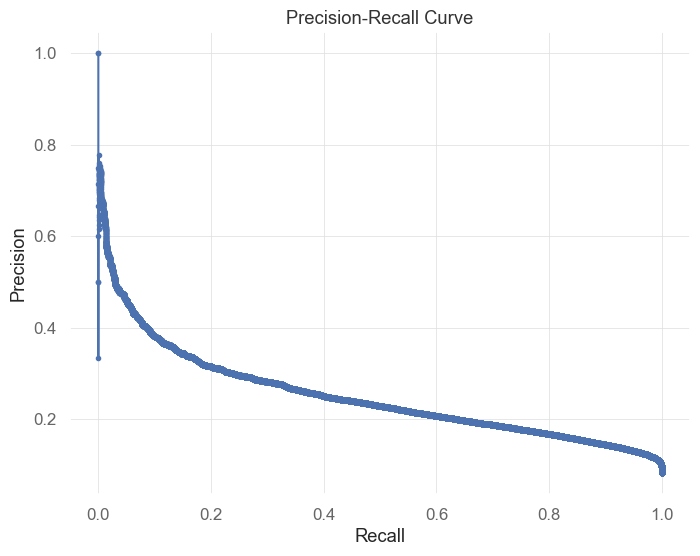

In [212]:
#Using Precision-Recall Curve instead of ROC_AUC because of Class imbalance in Target

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = xgb.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

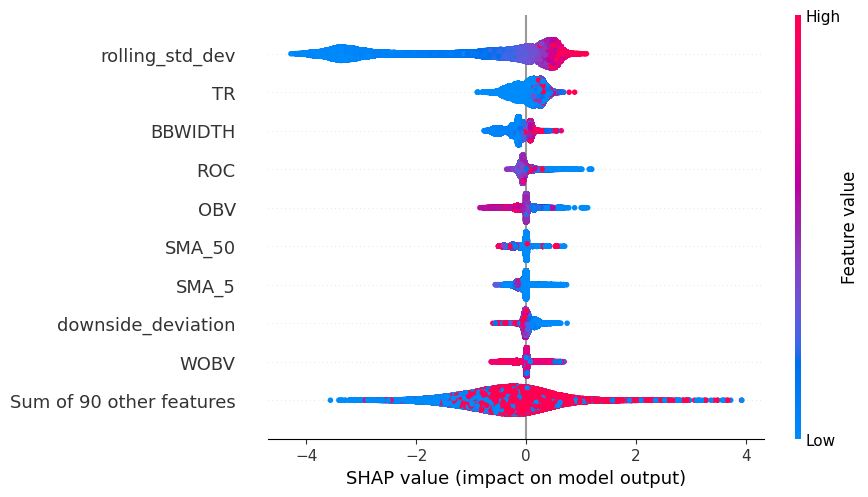

In [176]:
#Get Shap Values to learn most valuable features to the model. Most seem to be momentume-related


# Assuming 'model' is your trained machine learning model and 'X_test' is your test dataset
# For example, model could be an instance of a RandomForestClassifier from scikit-learn
import shap
# Calculate SHAP values
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Plot the SHAP values for the test set
shap.plots.beeswarm(shap_values, show=False)
plt.show()

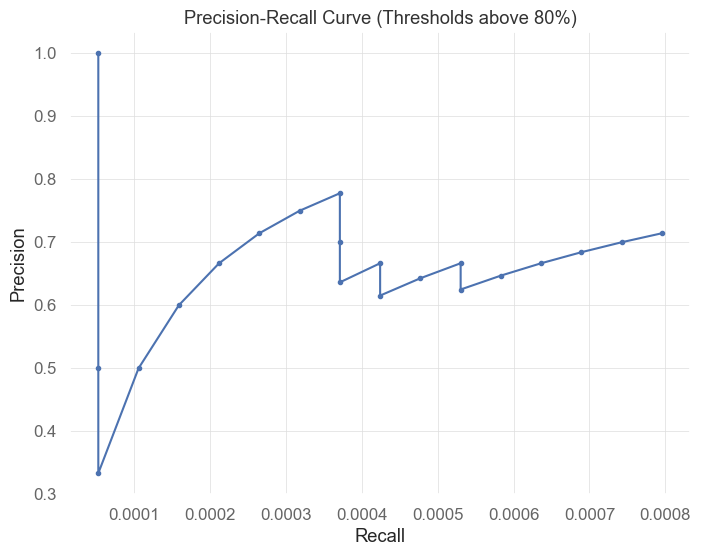

In [213]:
#See where threshold maximizes precision
# Filter for thresholds above 80%
above_80_indices = thresholds >= 0.80
filtered_precision = precision[:-1][above_80_indices]  # Exclude the last element in precision
filtered_recall = recall[:-1][above_80_indices]  # Exclude the last element in recall

plt.figure(figsize=(8, 6))
plt.plot(filtered_recall, filtered_precision, marker='.')
plt.title('Precision-Recall Curve (Thresholds above 80%)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

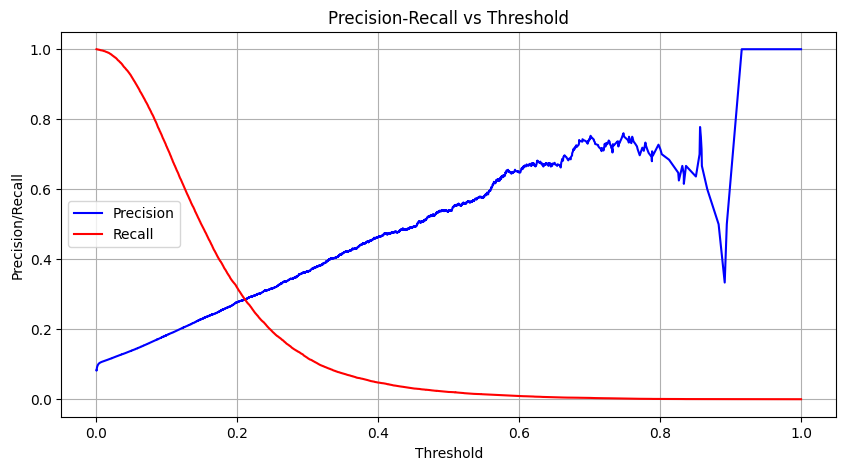

In [180]:
#See where thresholds maximize Precision

import numpy as np
# Adding last threshold as 1 to match the length of the precision and recall arrays
y_scores = xgb.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
thresholds_with_padding = np.append(thresholds, 1)
plt.figure(figsize=(10,5))

# Plot precision-recall curve
plt.plot(thresholds_with_padding, precision, 'b', label='Precision')
plt.plot(thresholds_with_padding, recall, 'r', label='Recall')

# Add some helpful labels and a legend
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')

# Adding a grid
plt.grid(True)

# Show the plot
plt.show()

In [214]:
# Load the model from the file
xgb_model = XGBClassifier()  # Use XGBRegressor if it's a regression problem
xgb_model.load_model('data/xgb_major_oversampled.dat')

Loading a native XGBoost model with Scikit-Learn interface.
